In [1]:
# ====================================
# 1️⃣ Import Required Libraries
# ====================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Set default style
sns.set(style="whitegrid")


In [2]:
# ====================================
# 2️⃣ Load Dataset
# ====================================
# Make sure 'owid-covid-data.csv' is in your working directory
df = pd.read_csv("covid_19_data.csv")

# Preview dataset
print(df.shape)
df.head()


(321, 6)


,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


In [3]:
# ====================================
# 3️⃣ Explore Dataset
# ====================================
# List all available columns
df.columns

# Check missing values
df.isnull().sum().sort_values(ascending=False).head(20)


State        181
Date           0
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

In [5]:
# ====================================
# 4️⃣ Data Cleaning
# ====================================
# Keep only useful columns
cols_to_keep = [
    "Date", "Region", "State",
    "Confirmed", "Deaths", "Recovered"
]
df = df[cols_to_keep]

# Convert date column to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Drop rows without Region or Date
df = df.dropna(subset=["Region", "Date"])


In [7]:
# ====================================
# 5️⃣ Filter Countries of Interest
# ====================================
countries = ["United States", "India", "Kenya", "Brazil"]
df_countries = df[df["Region"].isin(countries)]

df_countries.head()


,Date,Region,State,Confirmed,Deaths,Recovered
22,2020-04-29,Brazil,NaN,79685,5513,34132
74,2020-04-29,India,NaN,33062,1079,8437
86,2020-04-29,Kenya,NaN,384,15,129


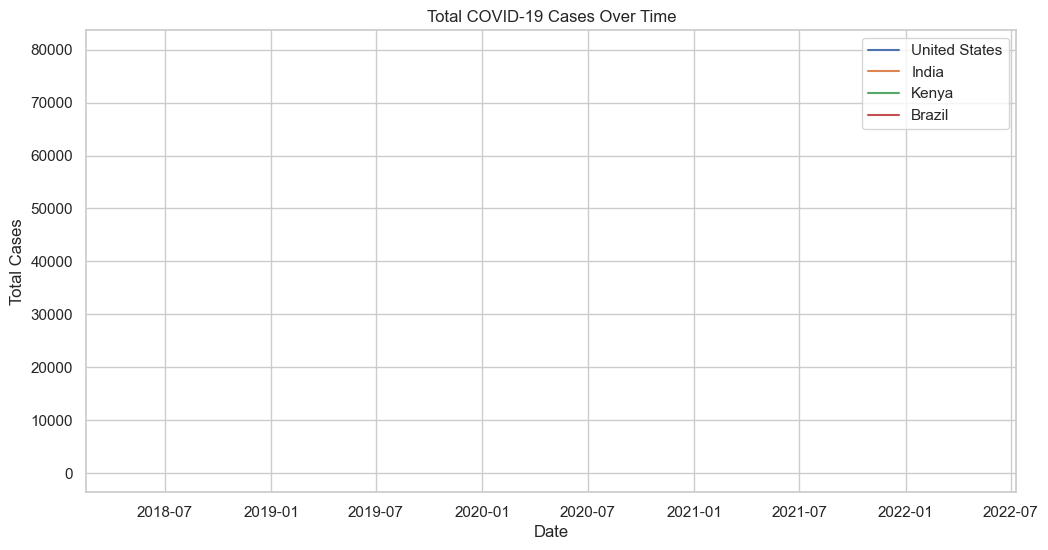

In [9]:
# ====================================
# 6️⃣ Exploratory Data Analysis (EDA)
# ====================================

# Plot total cases over time
plt.figure(figsize=(12,6))
for country in countries:
    subset = df_countries[df_countries["Region"] == country]
    plt.plot(subset["Date"], subset["Confirmed"], label=country)

plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.show()


In [11]:
# ====================================
# 7️⃣ Death Rate Calculation
# ====================================
df_countries["death_rate"] = df_countries["Deaths"] / df_countries["Confirmed"]

# Example: latest death rate by country
latest = df_countries.groupby("Region").apply(lambda x: x.sort_values("Date").iloc[-1])
latest[["Confirmed", "Deaths", "death_rate"]]


C:\Users\HP\AppData\Local\Temp\ipykernel_15964\1160197717.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_countries["death_rate"] = df_countries["Deaths"] / df_countries["Confirmed"]
C:\Users\HP\AppData\Local\Temp\ipykernel_15964\1160197717.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  latest = df_countries.groupby("Region").apply(lambda x: x.sort_values("Date").iloc[-1])


,Confirmed,Deaths,death_rate
Region,,,
Brazil,79685,5513,0.069185
India,33062,1079,0.032636
Kenya,384,15,0.039062


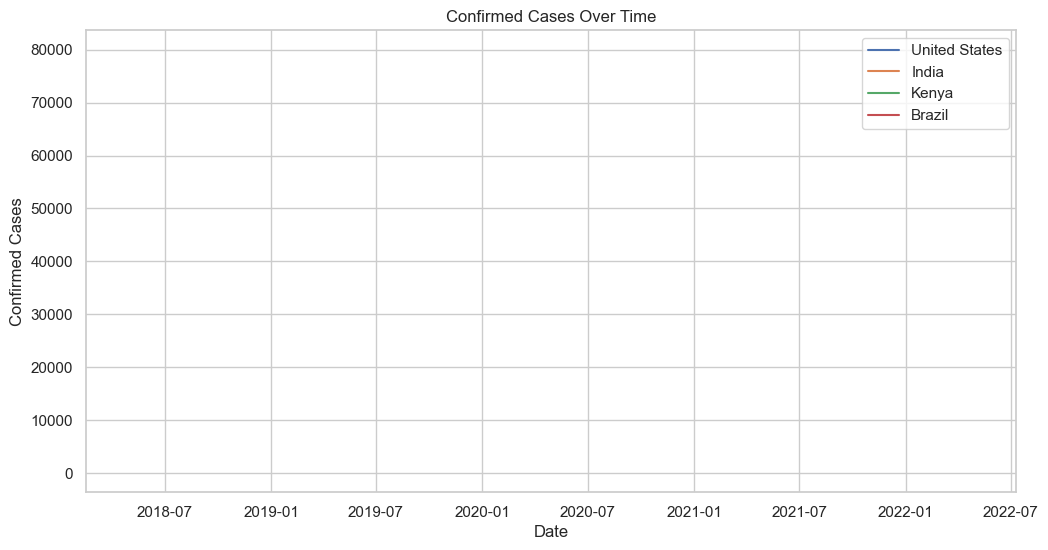

In [12]:
# ====================================
# 8️⃣ Vaccination Progress
# ====================================

plt.figure(figsize=(12,6))
for country in countries:
    subset = df_countries[df_countries["Region"] == country]
    plt.plot(subset["Date"], subset["Confirmed"], label=country)

plt.title("Confirmed Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.legend()
plt.show()